# 14a Neural Networks Tutorial
The Neural Network implementation in `sklearn` provides the `alpha` parameter to control overfitting.  
Overfitting can also be managed by controlling the model complexity, by reducing the number of layers and by reducing the number of units in each layer.    
 - Produce a graph of training and test set accuracy for different numbers of units in a neural network with a single hidden layer.    
 - Use the Diabetes data for this analysis. 
 - Run the evaluation from 2 to 40 units in steps of 2. 
 - Use the graphing code from the `14 Neural Networks` notebook to plot your results. 

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [2]:
y = diabetesDF.pop('neg_pos').values
X = diabetesDF.values

In [3]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=1)

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(random_state=0,max_iter=5000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 

Accuracy on training set: 0.996
Accuracy on test set: 0.773


## Solution

In [5]:
eval_range = range(2,40,2)
tr_scores = []
ts_scores = []

for h in eval_range:
    mlp = MLPClassifier(random_state=2, alpha = 0.15, hidden_layer_sizes=[h], max_iter=1000)
    mlp.fit(X_train_scaled, y_train)
    print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
    print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
    tr_scores.append(mlp.score(X_train_scaled, y_train))
    ts_scores.append(mlp.score(X_test_scaled, y_test))

Accuracy on training set: 0.770
Accuracy on test set: 0.777
Accuracy on training set: 0.742
Accuracy on test set: 0.770
Accuracy on training set: 0.779
Accuracy on test set: 0.773
Accuracy on training set: 0.777
Accuracy on test set: 0.820
Accuracy on training set: 0.789
Accuracy on test set: 0.777
Accuracy on training set: 0.797
Accuracy on test set: 0.797
Accuracy on training set: 0.795
Accuracy on test set: 0.801
Accuracy on training set: 0.801
Accuracy on test set: 0.789
Accuracy on training set: 0.809
Accuracy on test set: 0.809
Accuracy on training set: 0.807
Accuracy on test set: 0.797
Accuracy on training set: 0.795
Accuracy on test set: 0.785


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set: 0.840
Accuracy on test set: 0.785
Accuracy on training set: 0.838
Accuracy on test set: 0.785
Accuracy on training set: 0.832
Accuracy on test set: 0.797
Accuracy on training set: 0.840
Accuracy on test set: 0.777


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set: 0.859
Accuracy on test set: 0.797
Accuracy on training set: 0.844
Accuracy on test set: 0.789


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set: 0.861
Accuracy on test set: 0.809
Accuracy on training set: 0.865
Accuracy on test set: 0.785


In [8]:
df = pd.DataFrame({'Train': tr_scores, 'Test': ts_scores}, index = eval_range) 

Text(0, 0.5, 'Accuracy')

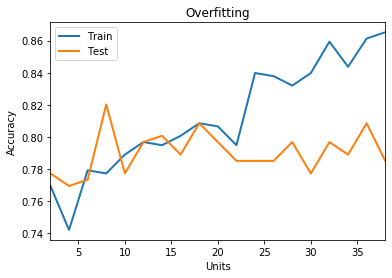

In [9]:
df = pd.DataFrame({'Train': tr_scores, 'Test': ts_scores}, index = eval_range) 
ax = df.plot(lw=2, title='Overfitting')
ax.set_xlabel("Units")
ax.set_ylabel("Accuracy")

## Using Grid Search

Search over a grid of alpha and hidden layer size alternatives.  
Using 8-fold cross validation and 'accuracy' as the metric. 

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=2, max_iter=1000)

grid = [{'alpha': [0.01, 0.1, 1, 10, 100],
         'hidden_layer_sizes': [[5], [10], [50]]}]
clf = GridSearchCV(mlp, grid, n_jobs = -1, cv=8, scoring = 'accuracy')
clf.fit(X_train, y_train)

In [ ]:
clf.best_score_, clf.best_params_

It's not good that the selected parameters are at the edge of the grid.  
So extend the grid.

In [ ]:
grid2 = [{'alpha': [1, 10, 100, 1000],
         'hidden_layer_sizes': [[10], [50], [100], [150]]}]

clf2 = GridSearchCV(mlp, grid2, n_jobs = -1, cv=8, scoring = 'accuracy')
clf2.fit(X_train, y_train)

In [ ]:
clf2.best_score_, clf.best_params_